In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

In [2]:
from michigan.fusion import Fusion
from michigan.dataprep import Data
import matplotlib.pyplot as plt
from nansat import Nansat
from michigan.michigan import MichiganProcessing
from michigan.plotbox import show_it
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
m_file = '/data/reprojected_data/MODISa/A2016187190000.L2_LAC_OC.x.nc_reprojected.nc'
s_file = '/data/reprojected_data/sentinel2/S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE_reprojected.nc'
s_file_l2 = '/data/sentinel2a/tests/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE'
s2_l1_data_repr = '/data/sentinel2a/tests/S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE_reprojected.nc'
s_file_l2_repr = '/data/sentinel2a/tests/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE_reprojected.nc'
fused_image = '/data/fused_data/20160705_20iter_neg_on_hires.nc'

=>michigan.grd<=
Rrs_412
(1248, 1952)
Rrs_443
(1248, 1952)
Rrs_488
(1248, 1952)
Rrs_531
(1248, 1952)
Rrs_645
(1248, 1952)
Rrs_678
(1248, 1952)
=>michigan.grd<=


<IPython.core.display.Javascript object>


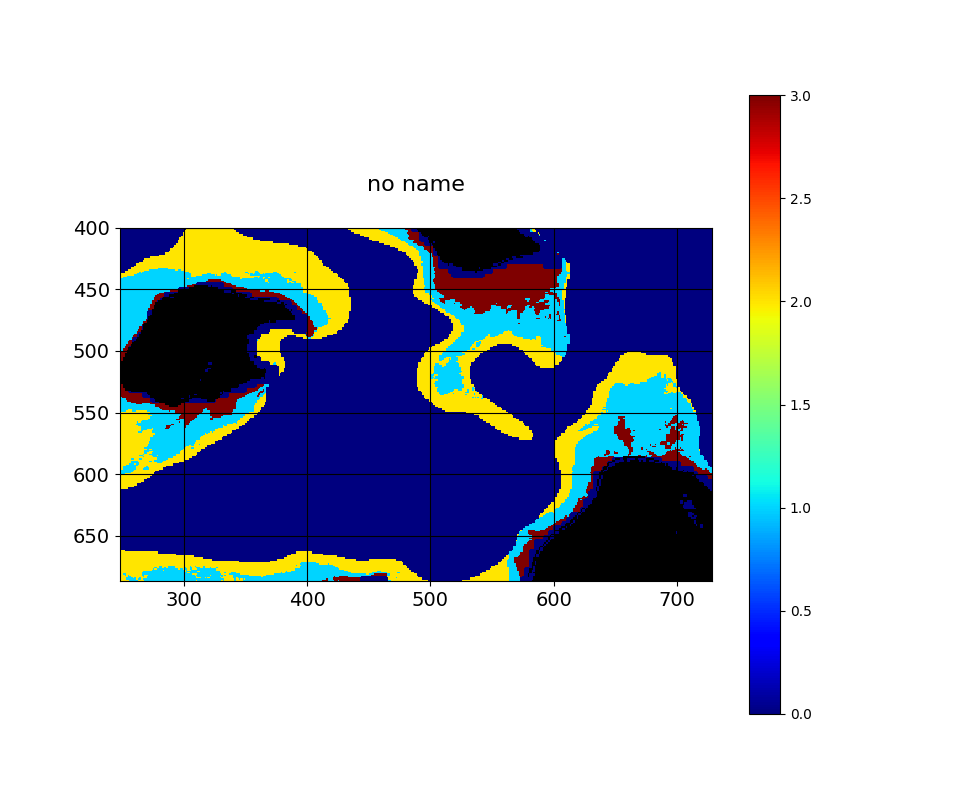

In [32]:
test = MichiganProcessing(fused_image)
arr = test.ifile['Rrs_%s' % 412]
bottom_class = test.bottom_classification(4)
#bottom_class = np.where(bottom_class == 0, np.nan, bottom_class)
show_it(bottom_class, land_mask=test.get_land_mask())

In [7]:
mic_fuse = Fusion(m_file, s2_l1_data_repr, h_mask=25)

=>michigan.grd<=


michigan/fusion.py:109: RuntimeWarning: invalid value encountered in greater
  h_mask[h_mask > h_limit] = np.nan
michigan/fusion.py:128: RuntimeWarning: invalid value encountered in greater
  hires_arr[:, hires_arr[7] > self.bMax] = np.nan
michigan/fusion.py:129: RuntimeWarning: invalid value encountered in less
  hires_arr[:, hires_arr[0] < self.bMin] = np.nan


In [8]:
n_lores, n_hires = mic_fuse.fusion(m_wavelengths='1x1km_bands')
n_hires.export('/data/fused_data/20160705_20iter_neg_on_h_mask+30m_hires_l1.nc')

Loading network from input file ... OK!
Saving network to file ... OK!
Applying network in 7 threads...
Feed 0 thread
Feed 1 thread
Feed 2 thread
Feed 3 thread
Feed 4 thread
Feed 5 thread
Feed 6 thread
Apply network
OK!
Loading network from input file ... OK!
Saving network to file ... OK!
Applying network in 7 threads...
Feed 0 thread
Feed 1 thread
Feed 2 thread
Feed 3 thread
Feed 4 thread
Feed 5 thread
Feed 6 thread
Apply network
OK!
Loading network from input file ... OK!
Saving network to file ... OK!
Applying network in 7 threads...
Feed 0 thread
Feed 1 thread
Feed 2 thread
Feed 3 thread
Feed 4 thread
Feed 5 thread
Feed 6 thread
Apply network
OK!
Creating training datasets from input data ... 

/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/ovl_plugins-0.1.42-py2.7.egg/ovl_plugins/fusion/fusion.py:98: RuntimeWarning: invalid value encountered in less
  nnData[nnData < 0] = np.nan
/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/ovl_plugins-0.1.42-py2.7.egg/ovl_plugins/fusion/fusion.py:99: RuntimeWarning: invalid value encountered in greater
  nnData[nnData > 1] = np.nan


 Number of training vectors: 523
OK!
Training network in 20 iterations ...
Train network
### -> RMSE
000 -> 0.168
001 -> 0.164
002 -> 0.150
003 -> 0.131
004 -> 0.124
005 -> 0.122
006 -> 0.120
007 -> 0.118
008 -> 0.118
009 -> 0.116
010 -> 0.116
011 -> 0.115
012 -> 0.116
013 -> 0.115
014 -> 0.114
015 -> 0.114
016 -> 0.114
017 -> 0.115
018 -> 0.114
019 -> 0.113
Training network - OK!
Saving network to file ... OK!
Applying network in 7 threads...
Feed 0 thread
Feed 1 thread
Feed 2 thread
Feed 3 thread
Feed 4 thread
Feed 5 thread
Feed 6 thread
Apply network
OK!
Creating training datasets from input data ...  Number of training vectors: 537
OK!
Training network in 20 iterations ...
Train network
### -> RMSE
000 -> 0.113
001 -> 0.112
002 -> 0.112
003 -> 0.111
004 -> 0.111
005 -> 0.110
006 -> 0.109
007 -> 0.109
008 -> 0.107
009 -> 0.106
010 -> 0.106
011 -> 0.105
012 -> 0.105
013 -> 0.104
014 -> 0.104
015 -> 0.104
016 -> 0.103
017 -> 0.103
018 -> 0.103
019 -> 0.103
Training network - OK!
Savin

<IPython.core.display.Javascript object>


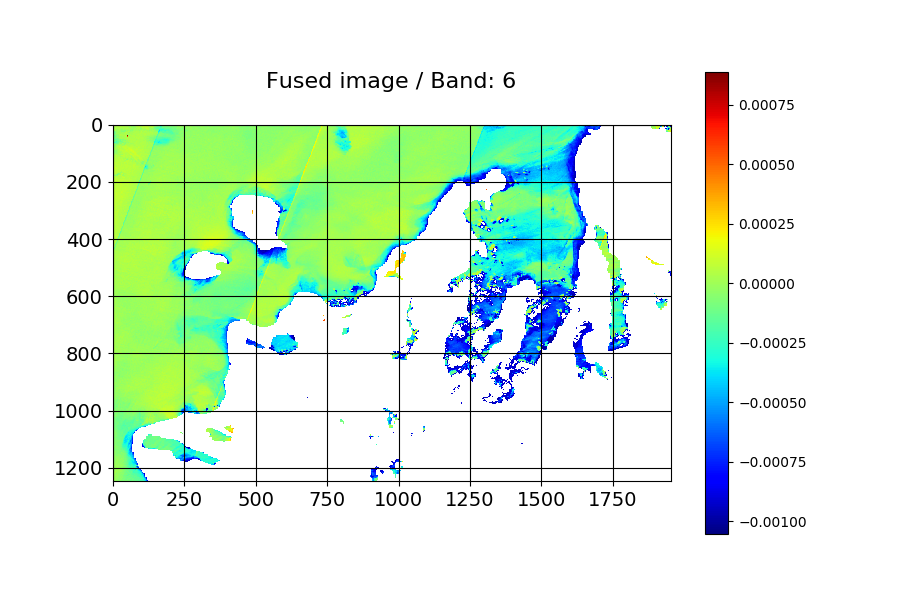

In [5]:
hires_band = 6
n_hires = Nansat('/data/fused_data/20160705_20iter_neg_on_hires.nc')
show_it(n_hires[hires_band], 'Fused image / Band: %s' % hires_band)

In [51]:
mic_fused_boreali = MichiganProcessing('/data/fused_data/20160705_20iter_neg_on_hires.nc')
mic_fused_boreali_cpa = mic_fused_boreali.boreali_processing()

=>michigan.grd<=


michigan/michigan.py:50: RuntimeWarning: invalid value encountered in less_equal
  h_10m = np.where(h <= 10, np.array(1), np.nan)


wavelen [412.0, 443.0, 488.0, 531.0, 645.0, 678.0]
R Name is  Rrs_


/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/boreali/boreali.py:295: RuntimeWarning: invalid value encountered in less
  negativePixels = rrsw.min(axis=0) < 0


Pixels x bands to process:  (374789, 6)
launch shallow
launch shallow
launch shallow
launch shallow
spent:  704.30582881


=>michigan.grd<=


<IPython.core.display.Javascript object>


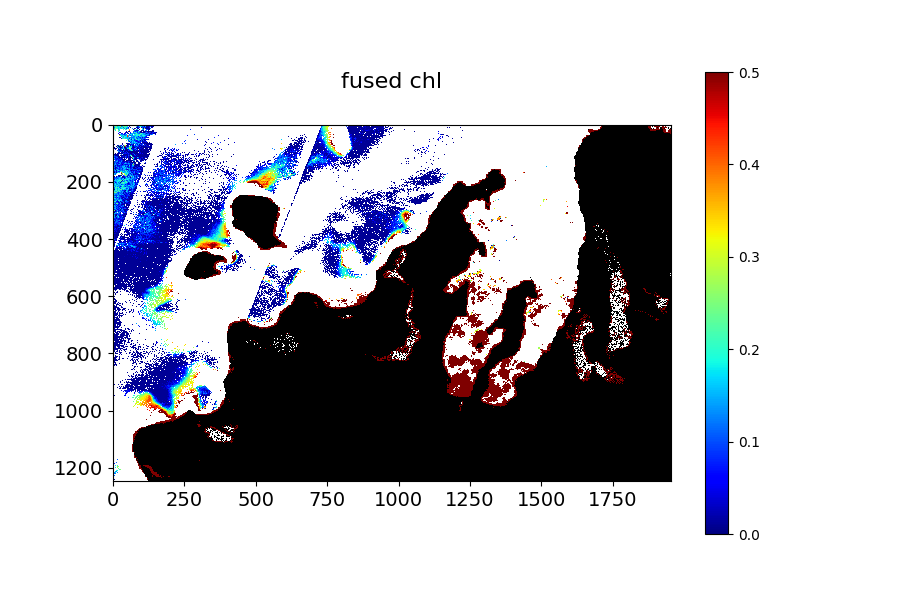

In [74]:
show_it(mic_fused_boreali_cpa['chl'], name='fused chl', limits=[0, 0.5], land_mask=mic_fused_boreali.get_land_mask())

=>michigan.grd<=
=>michigan.grd<=


<IPython.core.display.Javascript object>


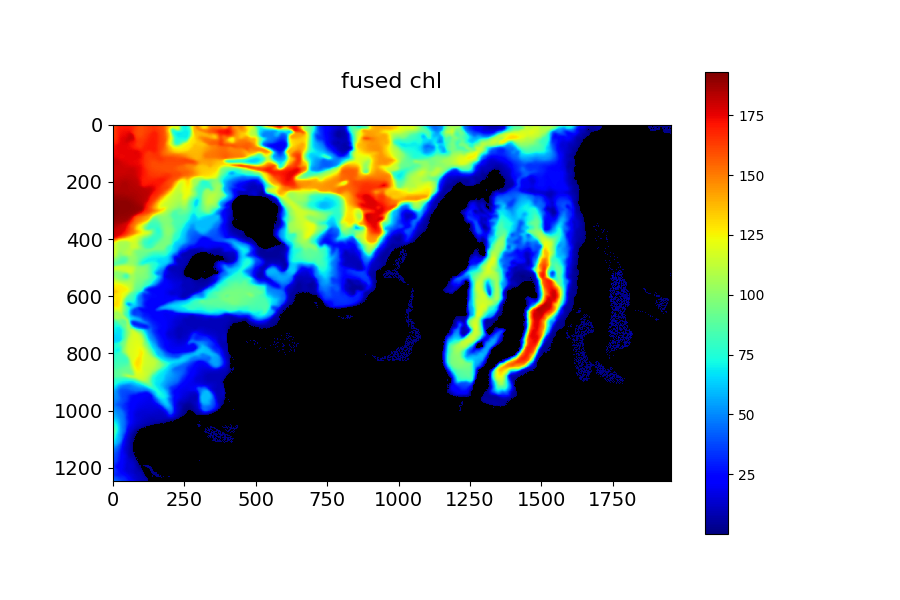

In [73]:
show_it(mic_fused_boreali.get_bottom(), name='fused chl', land_mask=mic_fused_boreali.get_land_mask())

In [314]:
k_train_arr = []
for band in mic_fused_boreali.wavelengths['modis']['1x1km_bands']:
        arr = mic_fused_boreali.ifile['Rrs_%s' % (band)]
        arr[np.isnan(arr) == True] = 999
        k_train_arr.append(arr.ravel())

k_train_arr = np.array(k_train_arr).T
kmeans = KMeans(n_clusters=5, random_state=0).fit(k_train_arr)
k_arr = kmeans.labels_
mask = np.where(np.isnan(mic_fused_boreali.ifile[2]), 0, 1).ravel()
mask[mask == 1] = arr


In [308]:
mask = np.where(mask == 0, np.nan, mask)

In [305]:
mask.ravel()

array([  2.,   2.,   2., ...,  nan,  nan,  nan])

=>michigan.grd<=


<IPython.core.display.Javascript object>


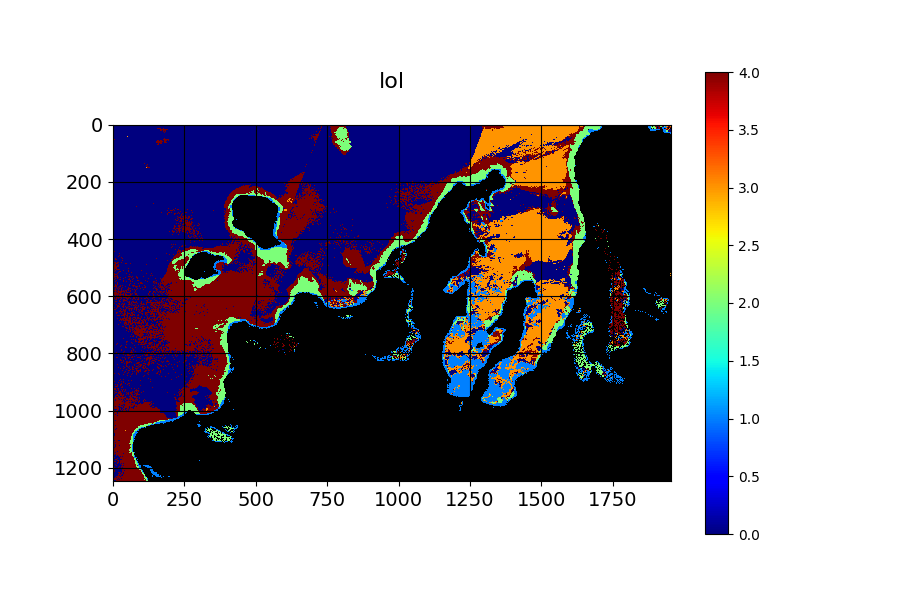

In [315]:
show_it(k_arr.reshape(mic_fused_boreali.domain.shape()), 'lol', land_mask=mic_fused_boreali.get_land_mask())

In [62]:
from michigan.dataprep import Data

In [44]:
s2_l2_data = Data(s_file_l2)
s2_l2_data.s2_downscale(save_path='/data/sentinel2a/tests/')

01:22:29|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
01:22:29|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
01:22:29|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
01:22:29|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE
Domain created


TypeError: 'list' object is not callable

In [43]:
s2_l1_data = Data('/data/sentinel2a/S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE')
s2_l1_data.s2_downscale(save_path='/data/sentinel2a/tests/')

S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE


12:37:47|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:37:47|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:37:47|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:37:47|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:37:47|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


Domain created
('Band:', '01', 443)


12:37:48|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:37:49|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:37:50|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:37:52|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '02', 490)


12:38:16|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:38:42|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:39:09|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:39:33|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '03', 560)


12:39:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:40:23|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:40:50|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:41:13|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '04', 665)


12:41:39|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:42:05|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:42:34|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:42:59|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '05', 705)


12:43:08|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:43:18|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:43:28|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:43:37|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '06', 740)


12:43:46|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:43:57|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:44:07|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:44:15|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '07', 783)


12:44:25|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:44:36|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:44:46|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:44:55|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '08', 842)


12:45:21|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:45:49|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:46:19|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:46:44|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '09', 945)


12:46:45|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:46:47|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:46:48|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:46:49|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '10', 1375)


12:46:50|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:46:51|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:46:52|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:46:53|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '11', 1610)


12:47:01|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:47:10|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:47:19|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:47:28|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '12', 2190)


12:47:36|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:47:45|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:47:53|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:48:02|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


('Band:', '8A', 865)


12:48:10|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:48:20|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!
12:48:29|30|nansat|_get_mapper|No mapper fits, returning GDAL bands!


In [47]:
m_l2_data = Data('/data/MODISa/LAC_OC/A2016187190000.L2_LAC_OC.x.nc')
m_l2_data.modis_geo_location(save_path='/data/sentinel2a/tests/')

/data/MODISa/LAC_OC/A2016187190000.L2_LAC_OC.x.nc
2016-07-05 19:00:10.924000+00:00
index
Rrs_412
Rrs_443
Rrs_488
Rrs_531
Rrs_645
Rrs_678


----------------------------------------

----------------------------------------
Mapper: 
----------------------------------------
Band : 1 index
  dataType: 5
  SourceBand: 1
  name: index
  SourceFilename: /vsimem/8P68P37UWK.vrt
Band : 2 Rrs_412
  dataType: 6
  SourceBand: 2
  name: Rrs_412
  SourceFilename: /vsimem/8P68P37UWK.vrt
Band : 3 Rrs_443
  dataType: 6
  SourceBand: 3
  name: Rrs_443
  SourceFilename: /vsimem/8P68P37UWK.vrt
Band : 4 Rrs_488
  dataType: 6
  SourceBand: 4
  name: Rrs_488
  SourceFilename: /vsimem/8P68P37UWK.vrt
Band : 5 Rrs_531
  dataType: 6
  SourceBand: 5
  name: Rrs_531
  SourceFilename: /vsimem/8P68P37UWK.vrt
Band : 6 Rrs_645
  dataType: 6
  SourceBand: 6
  name: Rrs_645
  SourceFilename: /vsimem/8P68P37UWK.vrt
Band : 7 Rrs_678
  dataType: 6
  SourceBand: 1
  name: Rrs_678
  SourceFilename: /vsimem/QITMO0Q59T.vrt
----------------------------------------
Domain:[1952 x 1248]
----------------------------------------
Projection:
GEOGCS["WGS 84",
    DATUM["

In [82]:
s2_l2_data_repr = Nansat('/data/sentinel2a/tests/S2A_USER_PRD_MSIL2A_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE_reprojected.nc')
s2_l1_data_repr = Nansat('/data/sentinel2a/tests/S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE_reprojected.nc')
m_l2_data_repr = Nansat('/data/sentinel2a/tests/A2016187190000.L2_LAC_OC.x.nc_reprojected.nc')

<IPython.core.display.Javascript object>


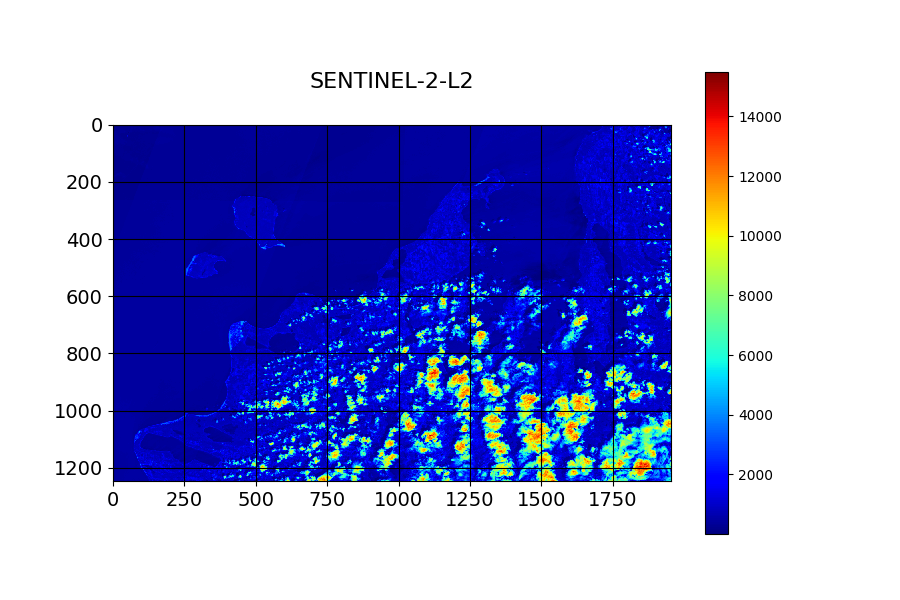

In [83]:
show_it(s2_l2_data_repr[5], 'SENTINEL-2-L2')

<IPython.core.display.Javascript object>


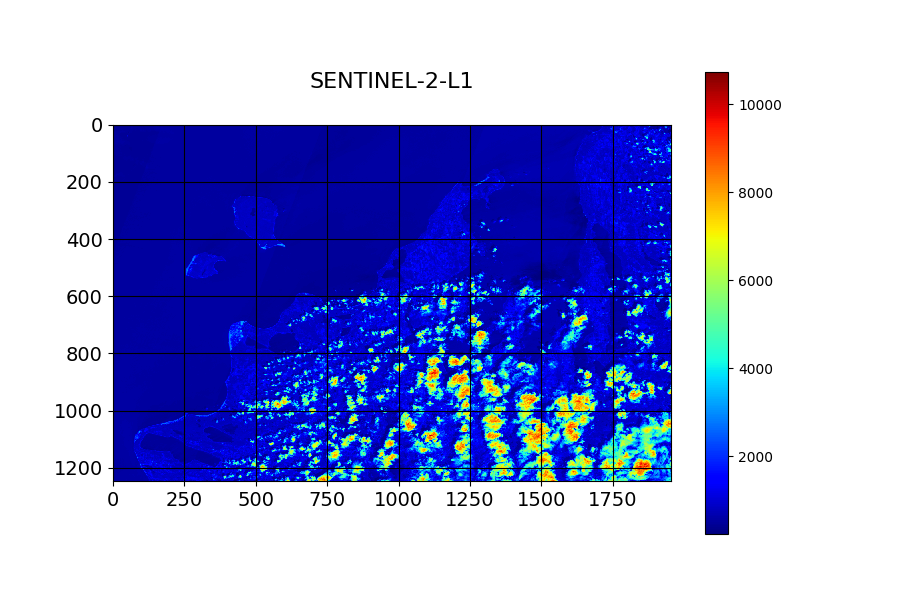

In [84]:
show_it(s2_l1_data_repr[5], 'SENTINEL-2-L1')

<IPython.core.display.Javascript object>


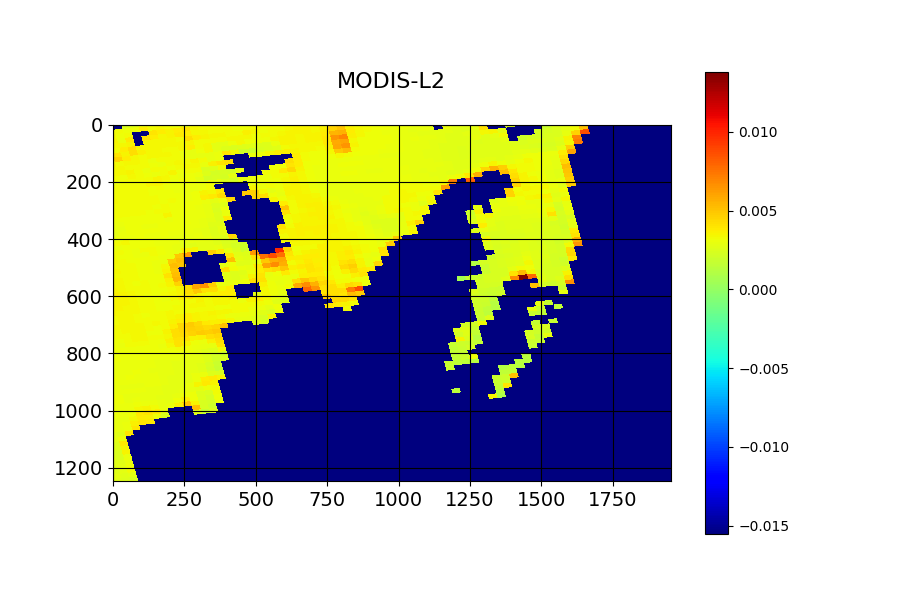

In [85]:
show_it(m_l2_data_repr[5], 'MODIS-L2')

In [119]:
def get_r(obj, coords, r_type='Rrs_', sensor='modis'):
    y, x = coords
    if sensor is 'modis':
        wavelengths = sorted(Data.wavelengths['modis']['1x1km_bands'])
    else:
        wavelengths = sorted(Data.wavelengths['sentinel2'].values())
    
    band_numbers = []
    for wavelength in wavelengths:
        try:
            band_numbers.append(obj._get_band_number(r_type + str(wavelength)))
        except:
            pass
    
    r_list = [obj[band][y][x] for band in band_numbers]
    return r_list, wavelengths

<IPython.core.display.Javascript object>


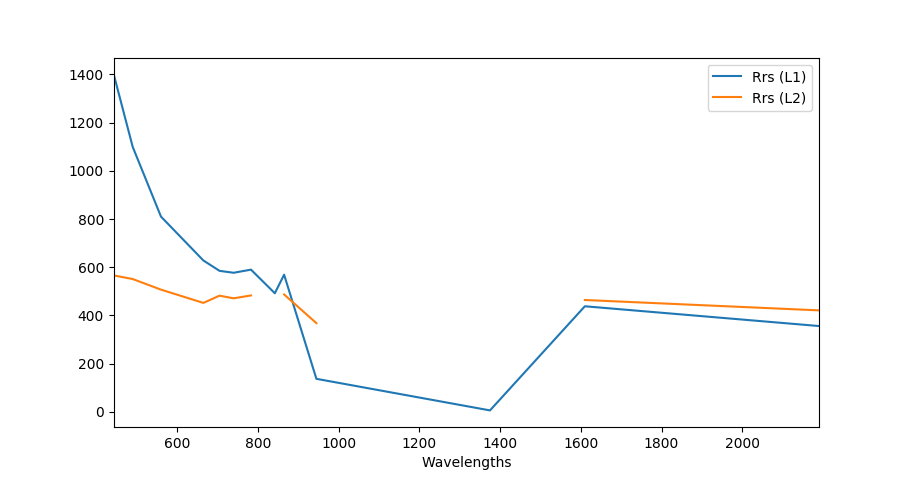

In [120]:
yx = (630, 340)

s2_l1_data_r, s2_l1_data_w = get_r(s2_l1_data_repr, coords=yx, sensor='sentinel2')
s2_l1_data_fr = pd.DataFrame({'Wavelengths': s2_l1_data_w, 'Rrs (L1)': s2_l1_data_r})

s2_l2_data_r, s2_l2_data_w = get_r(s2_l2_data_repr, coords=yx, sensor='sentinel2')
s2_l2_data_fr = pd.DataFrame({'Wavelengths': s2_l2_data_w, 'Rrs (L2)': s2_l2_data_r})

s2_all = pd.merge(s2_l1_data_fr, s2_l2_data_fr, 'right', on='Wavelengths')
s2_all.plot(x='Wavelengths')

In [51]:
mic_fuse_test = Fusion(m_file,s_file_l2_repr, h_mask=40)

=>michigan.grd<=


In [36]:
hiresfile = Nansat(s_file_l2_repr)
band_rrs_numbers = [hiresfile._get_band_number('Rrs_%s' % wavelength)
                            for wavelength in sorted(Data.wavelengths['sentinel2'].values())]
        # Create array form
hires_np_array = np.array([hiresfile[i] for i in band_rrs_numbers])

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

def get_bottom():
    bathymetry = Nansat(Fusion.BATHYMETRY_PATH)
    bathymetry.reproject(Data.sbd_dom)
    # preparing of bottom field
    h = bathymetry[1]
    # all points there h >= 0 will marked as np.nan
    h = np.where(h >= 0, np.nan, np.float32(h) * -1)
    return h

def get_h_mask(h_max, h_min=None, mask_val=np.nan):
    h_mask = get_bottom()
    h_mask[h_mask > h_max] = mask_val

    if h_min is not None:
        h_mask[h_mask < h_min] = mask_val
    
    return h_mask
 
def bottom_classification(obj, wavelengths_set='1x1km_bands', h_max=30, h_min=None):
    train_arr = []
    mask = get_h_mask(h_max=h_max, h_min=h_min)

    for band in Data.wavelengths['modis'][wavelengths_set]:
        print 'Rrs_%s' % band
        arr = obj['Rrs_%s' % band]
        # all 999 pixels will combined in one class
        arr = arr[np.isfinite(mask) == True]
        arr = arr[np.isfinite(arr) == True]
        train_arr.append(arr.ravel())

    train_arr = np.array(train_arr).T
    # kmeans = KMeans(n_clusters=clusters, random_state=0).fit(k_train_arr)
    # arr = kmeans.labels_
    # arr = arr.reshape(self.domain.shape())
    # return arr
    return train_arr
    
f = Nansat(fused_image)
train_arr = bottom_classification(f)


=>michigan.grd<=


/home/amoiseev/Programs/Miniconda/envs/niersc/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater


Rrs_412
Rrs_443
Rrs_488
Rrs_531
Rrs_645
Rrs_678


In [5]:
train_arr.shape

(312883, 6)

In [6]:
z = linkage(train_arr, 'ward')

MemoryError: 

In [20]:
z

array([[ 4.        ,  5.        ,  0.1132108 ,  2.        ],
       [ 2.        ,  3.        ,  0.54110957,  2.        ],
       [ 1.        ,  7.        ,  0.96226308,  3.        ],
       [ 0.        ,  6.        ,  0.96658229,  3.        ],
       [ 8.        ,  9.        ,  3.39594089,  6.        ]])